## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from xgboost import XGBClassifier 
from sklearn.metrics import cohen_kappa_score,make_scorer

## Loading dataset

In [2]:
glass = pd.read_csv("glass.csv",names=["ID","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","type"])
target = glass["type"]
glass = glass.drop(["ID"], axis=1)
glass = glass.drop(["type"], axis=1)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


## Missing values

In [3]:
print(glass.isnull().sum().sum())
print(target.isnull().sum())

0
0


## Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(glass,target,test_size = 0.3)

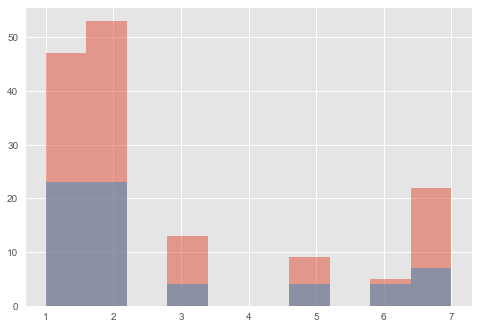

In [5]:
plt.style.use("ggplot")
plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

## Data Visualization

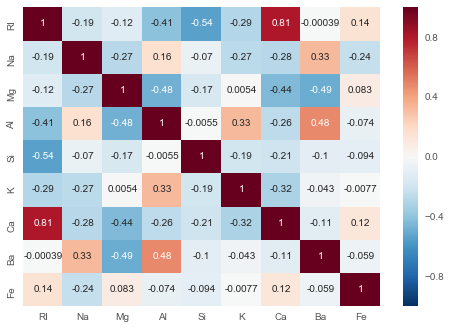

In [6]:
sns.heatmap(glass.corr(), annot=True)
plt.show()

## Hight corelation variables scatter plot 

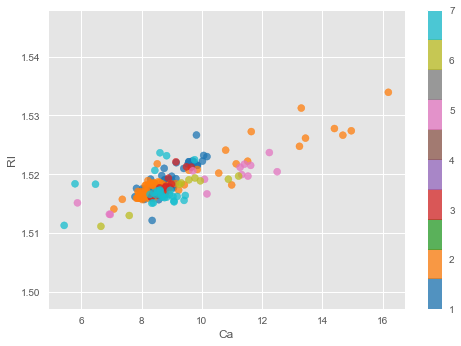

In [7]:
plt.style.use("ggplot")
plt.scatter(x=glass["Ca"],y=glass["RI"],marker='o',c=target,cmap='tab10', alpha = 0.75)
plt.xlabel("Ca")
plt.ylabel("RI")
plt.colorbar()
plt.show()

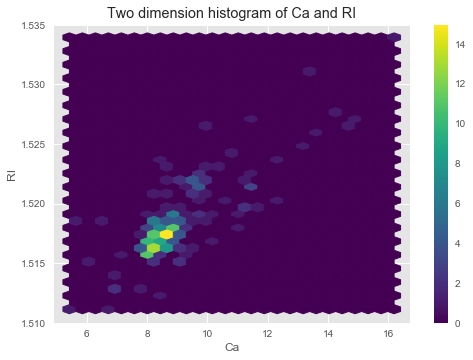

In [8]:
plt.hexbin(x=glass["Ca"],y=glass["RI"],gridsize=(25,20),cmap='viridis')
plt.colorbar()
plt.xlabel("Ca")
plt.ylabel("RI")
plt.title("Two dimension histogram of Ca and RI")
plt.show()

# Popular model with default hyper-parameters on all variables and all observation

In [9]:
def n_times_accuracy(classifier,n,dataset,target): #I will use this function in next part of analysis
    score=[]
    for i in np.arange(n):
        est = classifier() #It will working on all sklearn
        score.append(np.mean(cross_val_score(estimator=est,cv=7,X=dataset,y=target)))
    return(np.mean(score))

score_rf = n_times_accuracy(RandomForestClassifier,30,glass,target)
score_svm = n_times_accuracy(SVC,30,glass,target)
score_tree = n_times_accuracy(DecisionTreeClassifier,30,glass,target)
score_kneighboor = n_times_accuracy(KNeighborsClassifier,30,glass,target)
score_log_reg = n_times_accuracy(LogisticRegression,30,glass,target)
score_xgb = n_times_accuracy(XGBClassifier,30,glass,target)

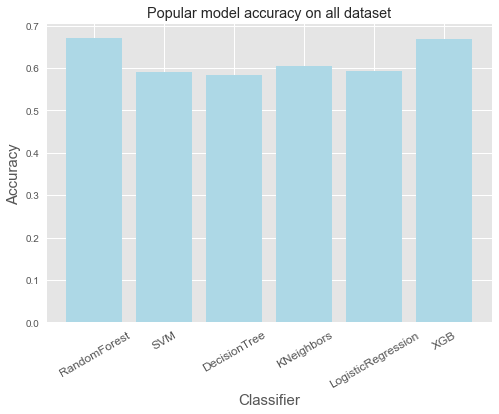

Maksimum accuracy is: 0.671290289332


In [10]:
scores = [score_rf,score_svm,score_tree,score_kneighboor,score_log_reg,score_xgb]
label = ["RandomForest","SVM","DecisionTree","KNeighbors","LogisticRegression","XGB"]
index = np.arange(len(label))

plt.style.use("ggplot")
plt.bar(index, scores, color = "lightblue")
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title("Popular model accuracy on all dataset")
plt.show()

print("Maksimum accuracy is: " + str(max(scores)))

# PCA

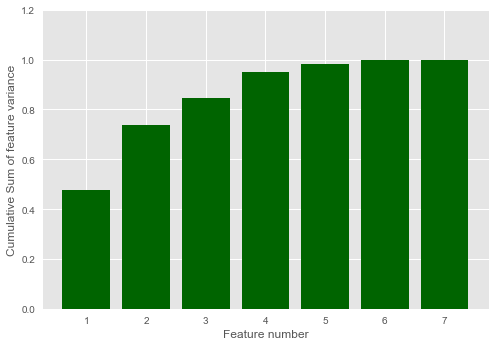

[ 0.47620525  0.73939801  0.84719844  0.94922308  0.98229031  0.99833805
  0.99976548]
We will use first 4 features


In [11]:
PCA_transf = PCA(n_components=7)
glass_PCA = PCA_transf.fit_transform(glass)

sum_of_variance = np.cumsum(PCA_transf.explained_variance_ratio_)
index = np.arange(1,len(sum_of_variance)+1)

plt.bar(index,sum_of_variance,color = "darkgreen")
plt.ylim(bottom = 0, top = 1.2)
plt.xlabel("Feature number")
plt.ylabel("Cumulative Sum of feature variance")
plt.show()
print(sum_of_variance)
print("We will use first 4 features")

In [12]:
glass_PCA = pd.DataFrame(glass_PCA)
glass_PCA = glass_PCA.drop([4],axis=1)
glass_PCA = glass_PCA.drop([5],axis=1)
glass_PCA = glass_PCA.drop([6],axis=1)
glass_PCA.head()

,0,1,2,3
0,-1.431425,-1.102115,-1.066958,-0.158237
1,-1.436707,0.343585,-0.277824,-0.293937
2,-1.427322,0.345720,0.138708,-0.321984
3,-1.257825,-0.249060,0.057742,0.022271
4,-1.312466,-0.018405,0.357510,-0.278564


## Test our models on PCA

In [13]:
score_rf_PCA = n_times_accuracy(RandomForestClassifier,30,glass_PCA,target)
score_svm_PCA = n_times_accuracy(SVC,30,glass_PCA,target)
score_tree_PCA = n_times_accuracy(DecisionTreeClassifier,30,glass_PCA,target)
score_kneighboor_PCA = n_times_accuracy(KNeighborsClassifier,30,glass_PCA,target)
score_log_reg_PCA = n_times_accuracy(LogisticRegression,30,glass_PCA,target)
score_xgb_PCA = n_times_accuracy(XGBClassifier,30,glass_PCA,target)

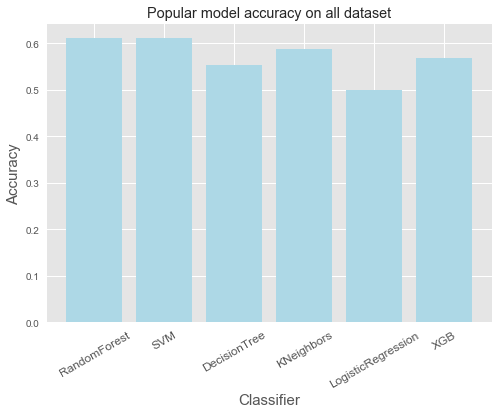

Maksimum accuracy is: 0.612152632314


In [14]:
scores_PCA = [score_rf_PCA,score_svm_PCA,score_tree_PCA,score_kneighboor_PCA,score_log_reg_PCA,score_xgb_PCA]
label = ["RandomForest","SVM","DecisionTree","KNeighbors","LogisticRegression","XGB"]
index = np.arange(len(label))

plt.style.use("ggplot")
plt.bar(index, scores_PCA, color = "lightblue")
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title("Popular model accuracy on all dataset")
plt.show()

print("Maksimum accuracy is: " + str(max(scores_PCA)))

# Random Forest feature selection

In [15]:
feature_importance = np.array([0,0,0,0,0,0,0,0,0])
for i in np.arange(50):
    classifier = RandomForestClassifier()
    classifier.fit(glass,target)
    feature_importance = feature_importance + classifier.feature_importances_
feature_importance= feature_importance/50

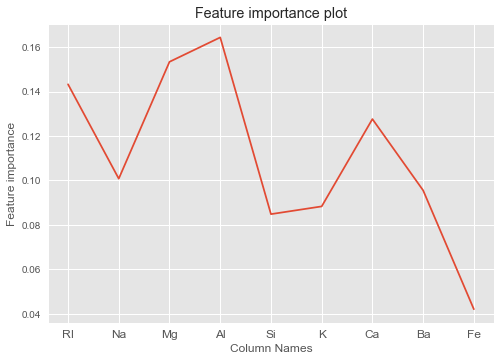

We try use only RI, MG, Al and Ca columns.


In [16]:
column_names = glass.columns
index = np.arange(len(column_names))

plt.style.use('ggplot')
plt.plot(feature_importance)
plt.xticks(index, column_names, fontsize=12)
plt.xlabel('Column Names')
plt.ylabel("Feature importance")
plt.title('Feature importance plot')
plt.show()

print("We try use only RI, MG, Al and Ca columns.")

In [17]:
glass_important_feature = pd.DataFrame({"RI":glass['RI'],"Mg":glass['Mg'],"Al":glass['Al'],"Ca":glass["Ca"]})
glass_important_feature.head()

,Al,Ca,Mg,RI
0,1.10,8.75,4.49,1.52101
1,1.36,7.83,3.60,1.51761
2,1.54,7.78,3.55,1.51618
3,1.29,8.22,3.69,1.51766
4,1.24,8.07,3.62,1.51742


## Test popular models

In [18]:
score_rf_IF = n_times_accuracy(RandomForestClassifier,30,glass_important_feature,target)
score_svm_IF = n_times_accuracy(SVC,30,glass_important_feature,target)
score_tree_IF = n_times_accuracy(DecisionTreeClassifier,30,glass_important_feature,target)
score_kneighboor_IF = n_times_accuracy(KNeighborsClassifier,30,glass_important_feature,target)
score_log_reg_IF = n_times_accuracy(LogisticRegression,30,glass_important_feature,target)
score_xgb_IF = n_times_accuracy(XGBClassifier,30,glass_important_feature,target)

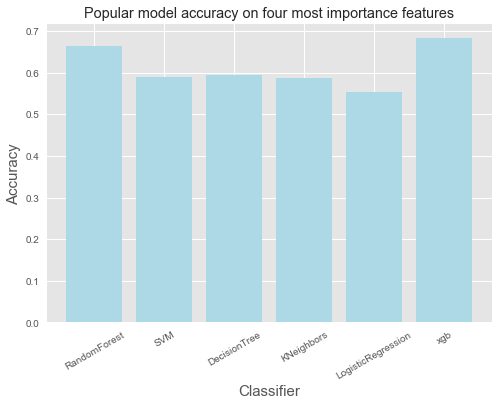

Maksimum accuracy is: 0.683787180561


In [19]:
scores_IF = [score_rf_IF,score_svm_IF,score_tree_IF,score_kneighboor_IF,score_log_reg_IF,score_xgb_IF]
label = ["RandomForest","SVM","DecisionTree","KNeighbors","LogisticRegression","xgb"]
index = np.arange(len(scores_IF))

plt.style.use("ggplot")
plt.bar(index, scores_IF, color = "lightblue")
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index,label, rotation = 30)
plt.title("Popular model accuracy on four most importance features")
plt.show()
print("Maksimum accuracy is: " + str(max(scores_IF)))